In [154]:
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model , preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [155]:
data = pd.read_csv("car.data")

In [156]:
data.head()

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [157]:
data.describe()

,buying,maint,door,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [158]:
#DATA PREPROCESSING - Label Encoding

In [159]:
la = preprocessing.LabelEncoder()
buying = la.fit_transform(list(data['buying']))
maint = la.fit_transform(list(data['maint']))
door = la.fit_transform(list(data['door']))
persons = la.fit_transform(list(data['persons']))
lug_boot = la.fit_transform(list(data['lug_boot']))
safety = la.fit_transform(list(data['safety']))
cls = la.fit_transform(list(data['class']))

In [160]:
data_new = data.copy()

In [161]:
data_new['buying'],data_new['maint'] = buying,maint
data_new['door'],data_new['persons'] = door, persons
data_new['lug_boot'],data_new['safety'],data_new['class'] = lug_boot, safety , cls

In [162]:
data_new.head()

,buying,maint,door,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [163]:
target = "class"

In [164]:
#Set target value

In [165]:
target = "class"

In [166]:
#Setting our X,y values (zip just returns tuples of the lists we've given)

In [187]:

y= data_new['class']
X=data_new.drop('class',axis=1)

In [204]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [218]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [219]:
model = KNeighborsClassifier(n_neighbors=7)


In [220]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [221]:
acc = model.score(X_test,y_test)
acc

0.930635838150289

Text(69.0, 0.5, 'Truth')

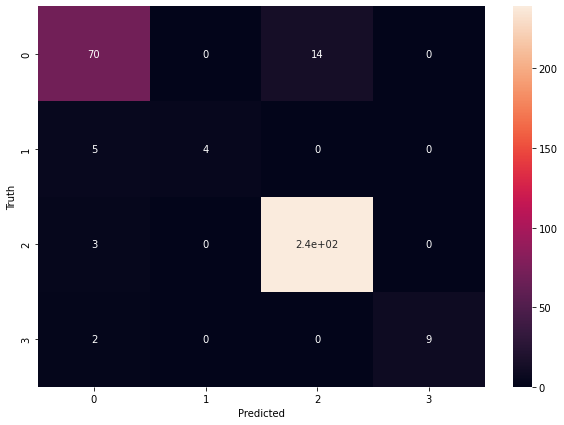

In [222]:
y_predicted= model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')